# Machine Learning and Deep Mining Spam Email Detection Project

SOFE 4620U - Machine Learning & Data Mining Final Project

---

### Problem Statement

The problem we wish to address is the filtering of spam emails from one's personal email address. Spam is a common issue for most individuals as various sites leak user’s email information to nefarious companies who then “spam” the users email with repetitive and often inappropriate advertisements. Although solutions for this problem already exist, we wish to build an email filtering system with categorization of spam emails to further our understanding of natural language processing and machine learning as a whole. 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import re
import enchant
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer



In [51]:
df = pd.read_csv("spam_nospam.csv", header=None)
df[:]

,0,1,2
0,CATEGORY,MESSAGE,FILE_NAME
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
2,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
3,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


## Dataset information and statistics
---

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5797 non-null   object
 1   1       5797 non-null   object
 2   2       5797 non-null   object
dtypes: object(3)
memory usage: 136.0+ KB


In [53]:
df.describe()

,0,1,2
count,5797,5797,5797
unique,3,5626,5797
top,0,\n\nHello I am your hot lil horny toy.\n\n ...,FILE_NAME
freq,3900,7,1


In [54]:
df.shape

(5797, 3)

In [55]:
df.dtypes

0    object
1    object
2    object
dtype: object

In [56]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

In [57]:
df = df.rename(columns={0:"Type", 1:"Message", 2:"Filename"})
df = df.drop(columns={"Filename"})
df = df.drop(0)
df[:]

,Type,Message
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
2,1,ATTENTION: This is a MUST for ALL Computer Use...
3,1,This is a multi-part message in MIME format.\n...
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
5,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver..."
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [58]:
df["Length"] = df["Message"].apply(len)
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1298
3,1,This is a multi-part message in MIME format.\n...,6691
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141
5,1,This is the bottom line. If you can GIVE AWAY...,1795
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",953
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,257
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",393
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1434


<Axes: xlabel='Type', ylabel='count'>

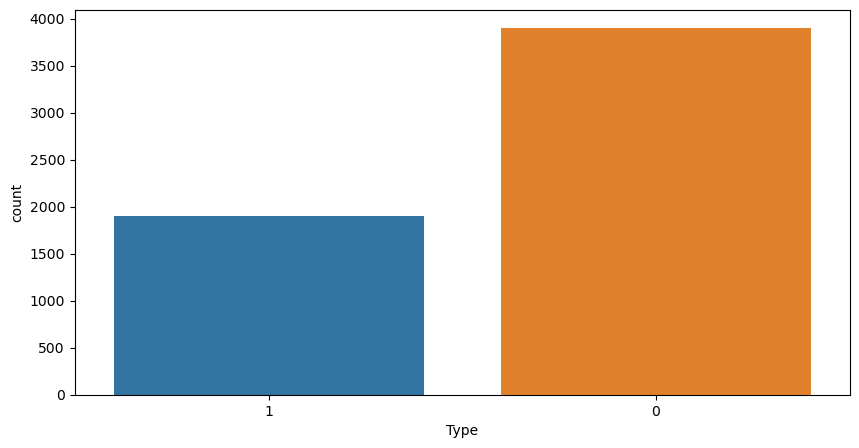

In [59]:
plt.figure(figsize = (10, 5))
x = df.Type.value_counts()
sns.countplot(x = "Type", data = df)

## Cleaning the dataset
---

In [60]:
df[:]

,Type,Message,Length
1,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612
2,1,ATTENTION: This is a MUST for ALL Computer Use...,1298
3,1,This is a multi-part message in MIME format.\n...,6691
4,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141
5,1,This is the bottom line. If you can GIVE AWAY...,1795
...,...,...,...
5792,0,"I'm one of the 30,000 but it's not working ver...",953
5793,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,257
5794,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",393
5795,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",1434


In [61]:
html_content_tags = ["html", "body", "head", "footer", "b", "br", "font", "http", "com", "www", "img", "alt", "table", "td", "arial", "helvetica", "sans-serif", "sans serif", "3d", "input", "colspan", "sans", "serif", "div", "text", "align", "type", "p", "margin"]

In [62]:
clean_html = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|^[0-9a-zA-Z]*=[0-9a-zA-Z\s\D]*"[0-9a-zA-Z\s\D]*"|<[0-9a-zA-Z\s\D]*?>|[0-9]*')

def remove_html_tags(string):
    return clean_html.sub("", string)

# Remove html tags from messages
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words in remove_html_tags(words)))
df["Length"] = df["Message"].apply(len)

In [63]:
# Removing punctuation
df["Message"] = df["Message"].str.replace("\W", " ", regex=True)

# Lower casing all letters
df["Message"] = df["Message"].str.lower()

# Remove blank space
df["Message"] = df["Message"].str.replace(r"\s+", " ", regex=True)
df["Message"] = df["Message"].str.replace(r"^\s+|\s*?$", " ", regex=True)

# Remove content transfer strings
df["Message"] = df["Message"].str.replace("content transfer", " ")

df[:]

,Type,Message,Length
1,1,dear homeowner interest rates are at their low...,467
2,1,attention this is a must for all computer user...,1116
3,1,this is a multi part message in mime format co...,1573
4,1,important information the new domain names are...,1037
5,1,this is the bottom line if you can give away c...,1579
...,...,...,...
5792,0,i m one of the but it s not working very well ...,817
5793,0,damien morton quoted approves html emotitags n...,234
5794,0,on mon at che wrote thats the correct lines to...,331
5795,0,once upon a time manfred wrote i would like to...,1179


In [64]:
stop_words_list = set(stopwords.words("english"))
df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in stop_words_list))

df["Message"] = df["Message"].apply(lambda x: " ".join(words for words in x.split() if words not in html_content_tags))

counter_message = 1
max_message_amount = len(df["Message"])
d = enchant.Dict("en_US")
for message in df["Message"]:
    message_new = message.split()
    for word in message_new:
        if d.check(word) == False:
            message_new.remove(word)
        
    df.loc[counter_message, "Message"] = ' '.join(message_new)
    message_new.clear()
    counter_message = counter_message + 1
    
    if (counter_message == max_message_amount):
        break

df["Length"] = df["Message"].apply(len)

In [65]:
df[:]

,Type,Message,Length
1,1,dear homeowner interest rates lowest point yea...,340
2,1,attention must computer users new special pack...,676
3,1,multi part message mime format content plain e...,785
4,1,important information new domain names finally...,666
5,1,bottom line give away cd free people like one ...,903
...,...,...,...
5792,0,one working well week updates servers syncing ...,387
5793,0,morton quoted approves able say feeling times ...,96
5794,0,mon wrote correct lines added sources list rep...,184
5795,0,upon time wrote would like install rpm tried g...,672


In [66]:
#non_spam = df[df.Type == 0]
#spam = df[df.Type == 1]

#non_spam_text = " ".join(non_spam.Message.to_numpy().tolist())
#spam_text = " ".join(spam.Message.to_numpy().tolist())

non_spam_amount = []
spam_amount = []
counter = 0

# Add spam and non-spam messages to their own array list

for i in df["Type"]:
    if (i == "0"):
        non_spam_amount.append(df["Message"].iloc[counter])
    elif (i == "1"):
        spam_amount.append(df["Message"].iloc[counter])
    counter = counter + 1

### Cleaning Non-Spam Words
---

In [67]:
# Split each non-spam message into individual words and add them to an array list

for i in non_spam_amount:
    split_words_nonspam = i.split()

In [68]:
# Utilize counter function to determine most common non-spam words
word_set_nonspam = Counter(split_words_nonspam)
frequent_words_nonspam = word_set_nonspam.most_common(15)
print(frequent_words_nonspam)

[('folder', 5), ('pick', 3), ('display', 3), ('panasas', 3), ('exmh', 3), ('workers', 3), ('new', 2), ('ftoc', 2), ('rescan', 2), ('welch', 2), ('redhat', 2), ('run', 1), ('use', 1), ('button', 1), ('show', 1)]


In [69]:
# Display most occurring non-spam words
nonspam_amount = pd.DataFrame(frequent_words_nonspam)
nonspam_amount = nonspam_amount.rename(columns={0:"Words", 1:"Occurrences"})
nonspam_amount

,Words,Occurrences
0,folder,5
1,pick,3
2,display,3
3,panasas,3
4,exmh,3
5,workers,3
6,new,2
7,ftoc,2
8,rescan,2
9,welch,2


### Cleaning Spam Words
---

In [70]:
# Split each spam message into individual words and add them to an array list
for i in spam_amount:
    split_words_spam = i.split()

In [71]:
# Utilize counter function to determine most common spam words
word_set_spam = Counter(split_words_spam)
frequent_words_spam = word_set_spam.most_common(15)
print(frequent_words_spam)

[('size', 2), ('recent', 1), ('survey', 1), ('conducted', 1), ('women', 1), ('said', 1), ('unhappy', 1), ('lo', 1), ('proof', 1), ('large', 1), ('member', 1), ('much', 1), ('surface', 1), ('area', 1), ('capable', 1)]


In [72]:
# Display most occurring spam words
spam_amount = pd.DataFrame(frequent_words_spam)
spam_amount = spam_amount.rename(columns={0:"Words", 1:"Occurrences"})
spam_amount

,Words,Occurrences
0,size,2
1,recent,1
2,survey,1
3,conducted,1
4,women,1
5,said,1
6,unhappy,1
7,lo,1
8,proof,1
9,large,1


### Clean and Update Messages within Table
---

In [73]:
# Save to csv 
df[:].to_csv('cleaned_data.csv', index=False)
df[:]

,Type,Message,Length
1,1,dear homeowner interest rates lowest point yea...,340
2,1,attention must computer users new special pack...,676
3,1,multi part message mime format content plain e...,785
4,1,important information new domain names finally...,666
5,1,bottom line give away cd free people like one ...,903
...,...,...,...
5792,0,one working well week updates servers syncing ...,387
5793,0,morton quoted approves able say feeling times ...,96
5794,0,mon wrote correct lines added sources list rep...,184
5795,0,upon time wrote would like install rpm tried g...,672


## Most common words with wordcloud
---

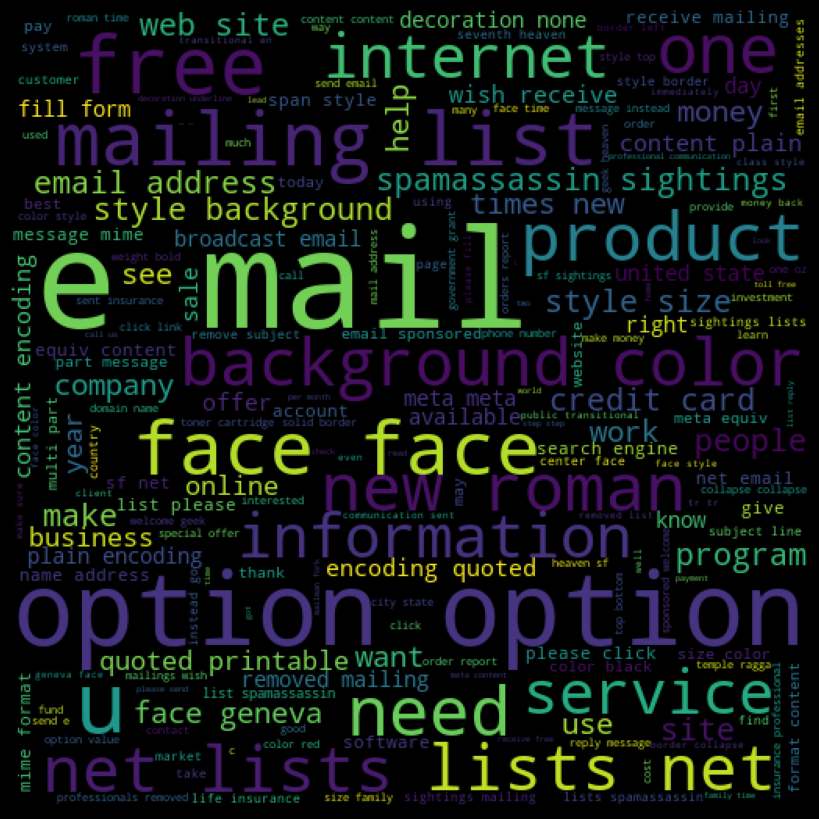

In [74]:
spam_words = " ".join(list(df[df["Type"] == "1"]["Message"]))
spam_wordcloud = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

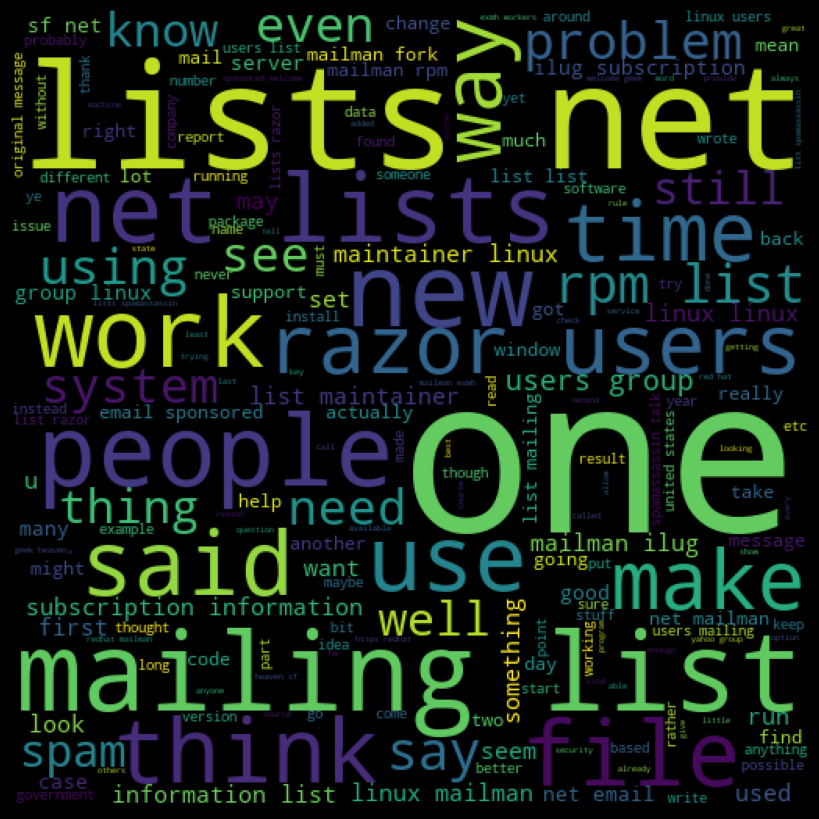

In [75]:
non_spam_words = " ".join(list(df[df["Type"] == "0"]["Message"]))
non_spam_wordcloud = WordCloud(width = 512, height = 512).generate(non_spam_words)
plt.figure(figsize = (10, 8), facecolor="k")
plt.imshow(non_spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Training and Testing Different Models 
---

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [77]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data[:]

,Type,Message,Length
0,1,dear homeowner interest rates lowest point yea...,340
1,1,attention must computer users new special pack...,676
2,1,multi part message mime format content plain e...,785
3,1,important information new domain names finally...,666
4,1,bottom line give away cd free people like one ...,903
...,...,...,...
5791,0,one working well week updates servers syncing ...,387
5792,0,morton quoted approves able say feeling times ...,96
5793,0,mon wrote correct lines added sources list rep...,184
5794,0,upon time wrote would like install rpm tried g...,672


In [78]:
X = cleaned_data['Message'].fillna(' ')  # message column
y = cleaned_data['Type'].fillna(' ')  # type column (spam/ham)

# split the data into training and testing sets with a 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# check the shapes of the resulting vectors
print("X_train shape:", X_train_vectorized.shape)
print("X_test shape:", X_test_vectorized.shape)

X_train shape: (4636, 27936)
X_test shape: (1160, 27936)


Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = nb.predict(X_test_vectorized)

# Evaluate Performance
bayes_accuracy = accuracy_score(y_test, y_pred)
bayes_precision = precision_score(y_test, y_pred)
bayes_recall = recall_score(y_test, y_pred)
bayes_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", bayes_accuracy)
print("Precision:", bayes_precision)
print("Recall:", bayes_recall)
print("F1:", bayes_f1)

Accuracy: 0.975
Precision: 0.9893899204244032
Recall: 0.9371859296482412
F1: 0.9625806451612904


Support Vector Machines | SVM

In [80]:
from sklearn.svm import SVC

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = svm.predict(X_test_vectorized)

# Evaluate Performance
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1:", svm_f1)


Accuracy: 0.9879310344827587
Precision: 0.9824120603015075
Recall: 0.9824120603015075
F1: 0.9824120603015075


Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = rf.predict(X_test_vectorized)

# Evaluate Performance
forest_accuracy = accuracy_score(y_test, y_pred)
forest_precision = precision_score(y_test, y_pred)
forest_recall = recall_score(y_test, y_pred)
forest_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", forest_accuracy)
print("Precision:", forest_precision)
print("Recall:", forest_recall)
print("F1:", forest_f1)

Accuracy: 0.9801724137931035
Precision: 0.9699248120300752
Recall: 0.9723618090452262
F1: 0.9711417816813049


K-Nearest Neighbors | KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = knn.predict(X_test_vectorized)

# Evaluate Performance
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1:", knn_f1)

Accuracy: 0.44310344827586207
Precision: 0.38122605363984674
Recall: 1.0
F1: 0.5520110957004162


Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train_vectorized, y_train)

# Predict the class of new emails
y_pred = lr.predict(X_test_vectorized)

# Evaluate Performance
regression_accuracy = accuracy_score(y_test, y_pred)
regression_precision = precision_score(y_test, y_pred)
regression_recall = recall_score(y_test, y_pred)
regression_f1 = f1_score(y_test, y_pred)

# print the evaluation metrics
print("Accuracy:", regression_accuracy)
print("Precision:", regression_precision)
print("Recall:", regression_recall)
print("F1:", regression_f1)

Accuracy: 0.9775862068965517
Precision: 0.9869109947643979
Recall: 0.9472361809045227
F1: 0.9666666666666667


<Axes: >

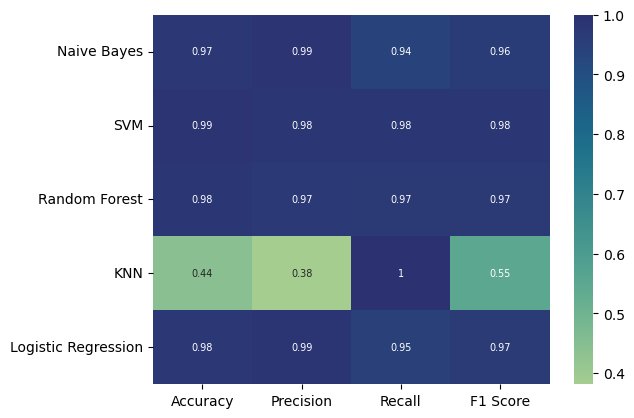

In [89]:
data_results = [[bayes_accuracy, bayes_precision, bayes_recall, bayes_f1], 
                [svm_accuracy, svm_precision, svm_recall, svm_f1], 
                [forest_accuracy, forest_precision, forest_recall, forest_f1], 
                [knn_accuracy, knn_precision, knn_recall, knn_f1], 
                [regression_accuracy, regression_precision, regression_recall, regression_f1]]
df_heatmap = pd.DataFrame(data_results, columns=["Accuracy", "Precision", "Recall", "F1 Score"])
sns.heatmap(df_heatmap, annot=True, annot_kws={"size": 7}, yticklabels=["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"], cmap="crest")

In [92]:
accuracy_results = [bayes_accuracy, svm_accuracy, forest_accuracy, knn_accuracy, regression_accuracy]
precision_results = [bayes_precision, svm_precision, forest_precision, knn_precision, regression_precision]
recall_results = [bayes_recall, svm_recall, forest_recall, knn_recall, regression_recall]
f1_results = [bayes_f1, svm_f1, forest_f1, knn_f1, regression_f1]

In [115]:
bayes = [bayes_accuracy, bayes_precision, bayes_recall, bayes_f1]
svm = [svm_accuracy, svm_precision, svm_recall, svm_f1]
forest = [forest_accuracy, forest_precision, forest_recall, forest_f1]
knn = [knn_accuracy, knn_precision, knn_recall, knn_f1]
regression = [regression_accuracy, regression_precision, regression_recall, regression_f1]

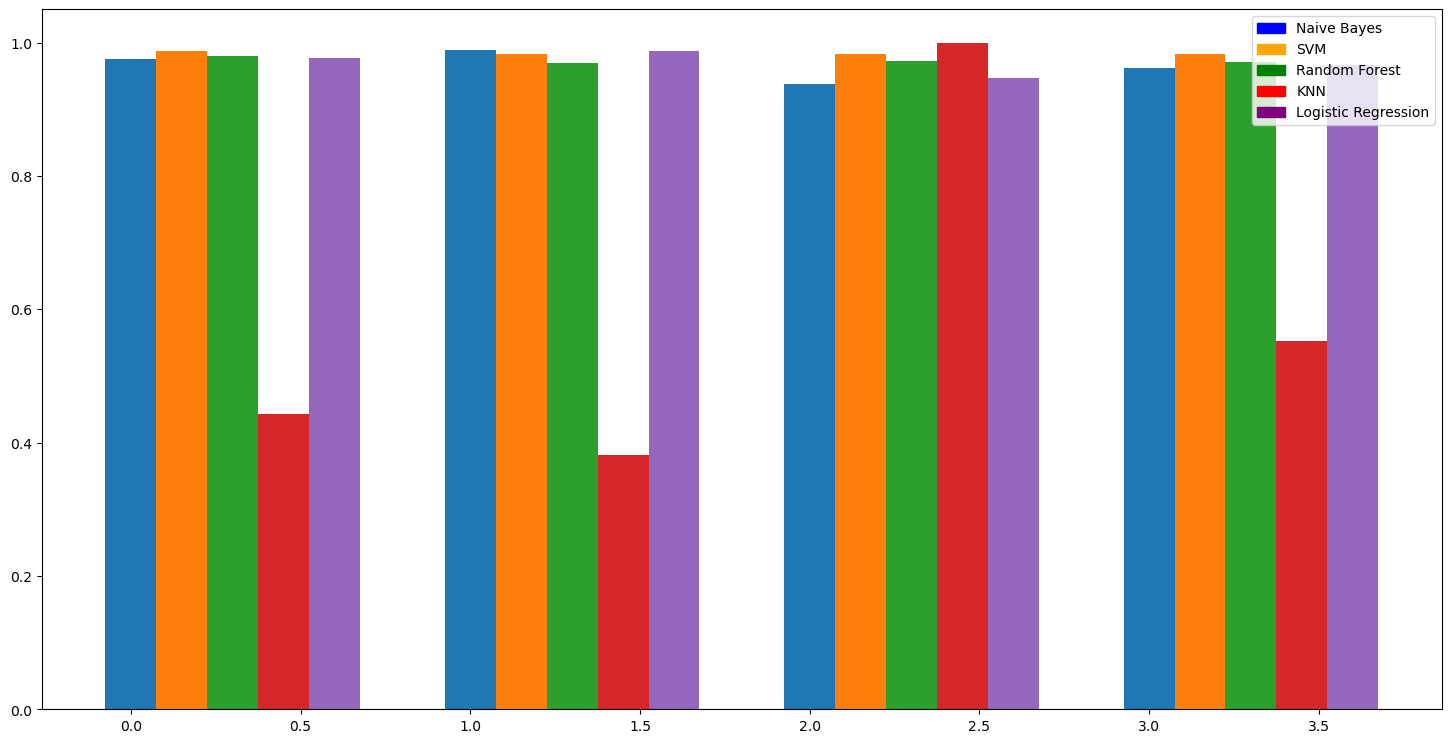

In [164]:
algorithm_models = ["Naive Bayes", "SVM", "Random Forest", "KNN", "Logistic Regression"]
colors = {"Naive Bayes":"blue", "SVM":"orange", "Random Forest":"green", "KNN":"red", "Logistic Regression":"purple"}
algorithm_types = plt.figure(figsize=(7, 7))
algorithm_axes = algorithm_types.add_axes([0, 0, 2, 1])
width = 0.15
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color = colors[label]) for label in labels]
algorithm_axes.bar(np.arange(len(bayes)), bayes, width = width)
algorithm_axes.bar(np.arange(len(svm)) + width, svm, width = width)
algorithm_axes.bar(np.arange(len(forest)) + width + width, forest, width = width)
algorithm_axes.bar(np.arange(len(knn)) + width + width + width, knn, width = width)
algorithm_axes.bar(np.arange(len(regression)) + width + width + width + width, regression, width = width)
#plt.text(0, round(bayes[0], 2), round(bayes[0], 2), ha = 'center')
#plt.text(0.15, round(svm[0], 2), round(svm[0], 2), ha = 'center')
plt.legend(handles, labels)
plt.show()